#  Обучение с учителем.

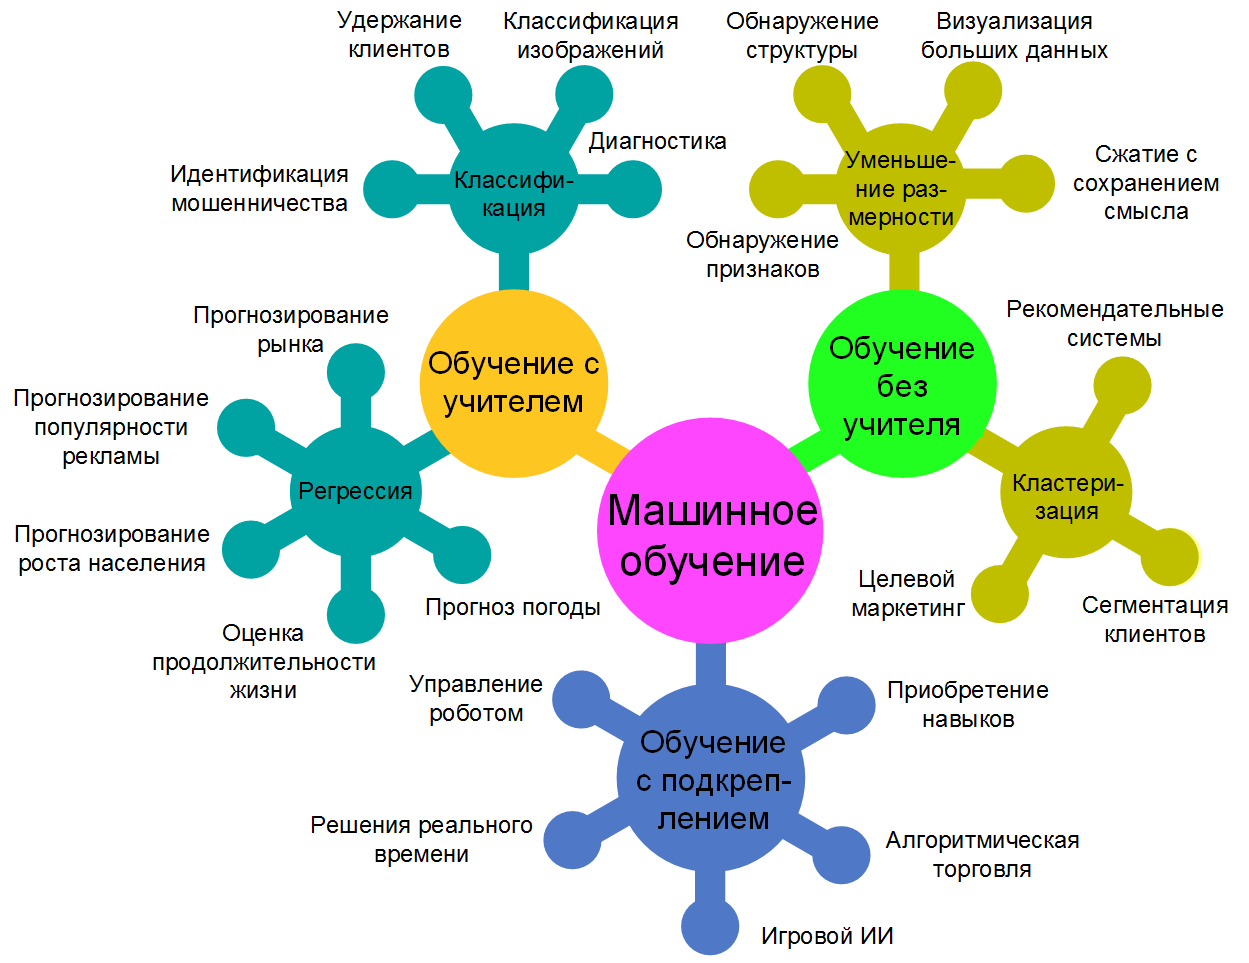 

**Обучение с учителем** = есть целевая переменная (таргет), которую мы предсказываем

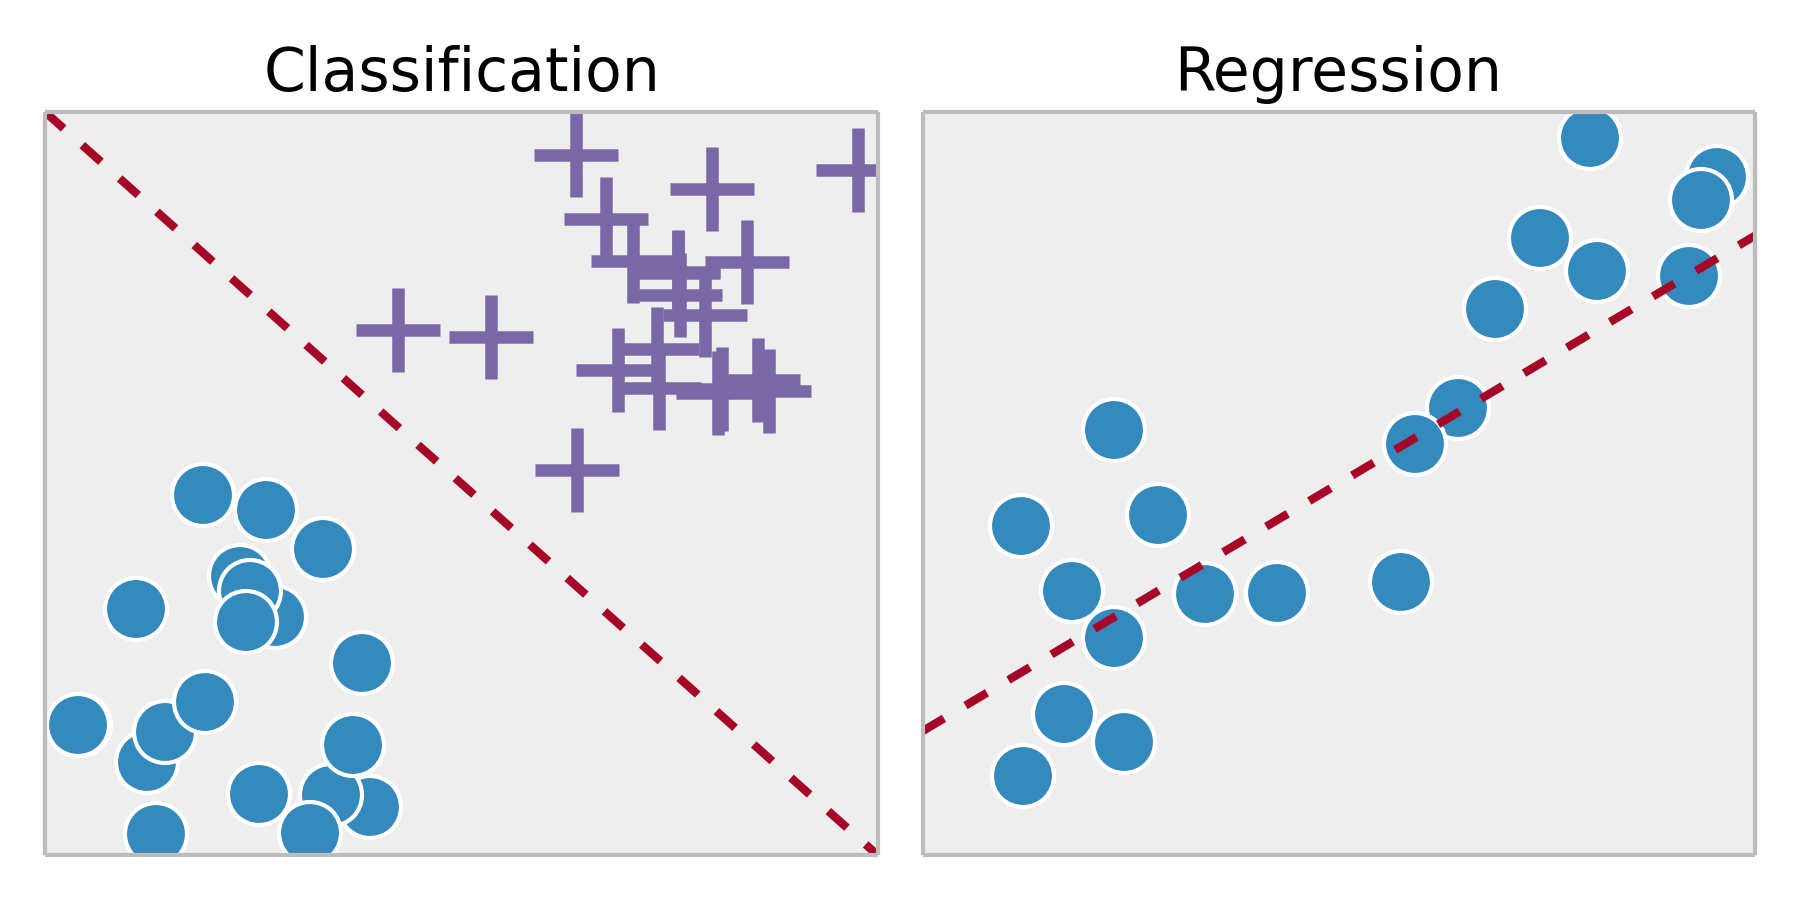

_Регрессия_ - таргет непрерывен
- Предсказание цен на дома
- Предсказание спроса на товары
- ...


_Классификация_ - Таргет принимает 2 (иногда k) значений
- Кредитный скоринг: вернет кредит (target=0) или нет (target=1)
- Определение вида животного по фото (0 - лев, 1 - пантера, 2 - леопард, ... , k - гепард) 
- ...

**Обучение без учителя** = нет целевой переменной:
- Разделение данных на группы
- ...
_______________

**Подключение библиотек и скриптов**

In [58]:
import time

start_time = float(time.time())

In [59]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [60]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [61]:
PREPARED_DATASET_PATH = 'prepared_COV_POL_dataset_1.csv'
PREPARED_DATASET_PATH_scalered = 'train_prepared_scalered.csv'

REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './models/scaler.pkl'
MODEL_FILE_PATH = './models/model.pkl'

# Шаг 1. Загрузка данных

In [62]:
# def reduce_mem_usage(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     start_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
#     for col in df.columns:
#         col_type = df[col].dtype
        
#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#         else:
#             pass
# #             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
#     return df

In [63]:
# Убираем колонки, значения в которых пристувуют только в 596 строках
df = pd.read_csv(PREPARED_DATASET_PATH)
df = df.drop('Specie_aqi_Count', 1)
df = df.drop('Specie_aqi_Min', 1)
df = df.drop('Specie_aqi_Max', 1)
df = df.drop('Specie_aqi_Median', 1)
df = df.drop('Specie_aqi_Variance', 1)



pd.set_option('display.max_columns', None)
# df = reduce_mem_usage(df)
df

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance
0,2021-01-02,1609534800,US,The United States of America,Queens,127132,7578,0.0,119554.0,5640.639295,5.960734,40.710881,-73.816847,Queens_US_1609534800,NaN,NaN,NaN,120.0,56.0,100.0,74.0,2056.71,NaN,NaN,NaN,NaN,NaN,117.0,4.0,55.0,31.0,1107.98,120.0,1006.0,1019.7,1010.7,186.18,48.0,4.4,26.4,10.8,374.83,72.0,1.9,6.5,2.6,9.52,118.0,0.2,13.9,5.5,142.43,NaN,NaN,NaN,NaN,NaN,101.0,3.5,27.2,14.9,449.23,23.0,-3.0,4.0,2.0,52.02,120.0,0.0,51.1,5.4,2320.66,72.0,2.4,22.4,16.8,212.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,1609534800,US,The United States of America,Columbus,3629,83,0.0,3546.0,6537.796354,2.287131,34.267441,-78.658014,Columbus_US_1609534800,NaN,NaN,NaN,48.0,82.6,98.0,90.4,222.34,NaN,NaN,NaN,NaN,NaN,46.0,4.0,40.0,18.0,928.73,48.0,1005.9,1018.5,1014.2,107.20,23.0,1.9,13.9,3.8,189.40,15.0,1.2,3.4,2.3,10.37,33.0,0.2,6.6,1.5,34.04,NaN,NaN,NaN,NaN,NaN,48.0,0.1,15.0,3.0,139.92,NaN,NaN,NaN,NaN,NaN,48.0,2.2,7.7,3.3,23.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-02,1609534800,US,The United States of America,Philadelphia,95401,2450,0.0,92951.0,6022.547069,2.568107,40.003385,-75.137927,Philadelphia_US_1609534800,NaN,NaN,NaN,96.0,60.5,100.0,83.0,1678.73,NaN,NaN,NaN,NaN,NaN,89.0,3.0,50.0,23.0,1016.68,96.0,1005.4,1019.8,1010.9,146.75,93.0,1.0,23.2,5.6,242.27,12.0,1.2,3.4,2.3,6.60,87.0,0.1,8.1,2.5,29.01,NaN,NaN,NaN,NaN,NaN,76.0,0.5,22.7,7.7,293.60,17.0,-1.3,5.0,3.0,48.69,96.0,0.0,13.5,5.7,92.04,91.0,1.6,24.8,15.2,195.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-02,1609534800,MY,Malaysia,Johor Bahru,5849,34,2858.0,2957.0,155.219999,0.581296,1.485400,103.761800,Johor Bahru_MY_1609534800,NaN,NaN,NaN,48.0,83.0,100.0,98.0,180.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1005.5,1011.5,1008.5,21.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.3,9.3,2.0,46.85,NaN,NaN,NaN,NaN,NaN,25.0,1.0,21.0,6.0,339.77,19.0,21.0,24.0,22.0,11.73,48.0,21.1,25.0,22.7,9.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-02,1609534800,MY,Malaysia,Kuala Lumpur,13945,23,9141.0,4781.0,784.131804,0.164934,3.139000,101.686900,Kuala Lumpur_MY_1609534800,NaN,NaN,NaN,168.0,70.0,94.0,83.0,541.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,1007.0,1012.0,1010.0,13.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,0.3,4.1,1.0,5.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,22.0,25.0,23.0,6.18,168.0,25.0,29.0,26.0,19.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           21597 non-null  object 
 1   Absolute_time                  21597 non-null  int64  
 2   Dugramm                        21597 non-null  object 
 3   Country_name                   21597 non-null  object 
 4   City                           21597 non-null  object 
 5   Confirmed                      21597 non-null  int64  
 6   Deaths                         21597 non-null  int64  
 7   Recovered                      11060 non-null  float64
 8   Active                         11060 non-null  float64
 9   Incident_rate                  21597 non-null  float64
 10  Case_fatality_ratio            21597 non-null  float64
 11  Lat                            21597 non-null  float64
 12  Long_                          21597 non-null 

# Шаг 2. EDA и очистка данных

In [65]:
df.describe()

,Absolute_time,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance
count,2.159700e+04,2.159700e+04,21597.000000,1.106000e+04,1.106000e+04,21597.000000,21597.000000,21597.000000,21597.000000,21537.000000,11000.000000,11000.000000,21426.000000,21426.000000,21426.000000,21426.000000,2.142600e+04,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,19634.000000,19634.000000,19634.000000,19634.000000,1.963400e+04,21427.000000,21427.000000,21427.000000,21427.000000,2.142700e+04,19045.000000,19045.000000,19045.000000,19045.000000,19045.000000,16756.000000,16756.000000,16756.000000,16756.000000,16756.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,17404.000000,17404.00000,17404.000000,17404.000000,1.740400e+04,14474.000000,14474.000000,14474.000000,14474.00000,14474.000000,16553.000000,16553.000000,16553.000000,16553.000000,16553.000000,21426.000000,21426.000000,21426.000000,21426.000000,21426.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,4165.000000,4165.000000,4165.000000,4165.000000,4.165000e+03,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,1.624597e+09,2.009868e+05,6022.973469,1.010975e+05,6.528598e+04,5182.815936,2.226068,34.612572,17.930980,13.599480,442.286364,217.858818,270.824839,44.223761,89.863138,68.489611,2.373871e+03,144.175911,1.317543,14.105498,2.378504,271.071549,253.068453,15.650759,105.821789,47.646226,7.543155e+03,270.261959,990.063527,1014.524875,1007.162179,6.988849e+03,261.397847,2.193185,28.848763,8.828517,436.024362,183.946527,2.026277,10.961286,4.085128,160.109830,238.850919,0.515016,7.036656,2.525629,38.360665,282.135314,8.26718,77.637440,24.339635,1.100446e+04,131.734489,2.178244,13.374167,6.12937,130.635706,196.061439,6.465227,12.553628,9.654739,53.990541,271.283441,10.102539,22.517745,15.802534,190.321254,252.287259,6.210525,42.196693,20.748611,1106.946696,28.404802,44.019448,81.709172,58.330348,8.630026e+03,241.643211,21.030327,329.994252,169.994054,73785.968295
std,9.059807e+06,5.113592e+05,18230.003986,3.975051e+05,1.527993e+05,4948.928730,2.606435,14.300071,101.967710,529.286018,2778.248178,2484.058665,399.682297,30.185154,22.501099,18.240577,4.137337e+04,217.587623,3.108329,32.122829,4.931660,3781.158577,388.331931,34.327730,106.417178,49.106311,5.933868e+04,400.414267,86.061680,36.880309,43.992749,6.158331e+04,401.899686,4.784980,22.276408,8.675764,1613.938734,296.121685,3.290688,19.456009,6.174249,4888.385895,341.735513,0.670475,4.611585,1.526391,695.531780,416.015930,

In [66]:
# убираем выбросы по Day_increase_Deaths
df['Day_increase_Deaths'].describe()

count    21537.000000
mean        13.599480
std        529.286018
min     -54440.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      54559.000000
Name: Day_increase_Deaths, dtype: float64

In [67]:
df = df.loc[~(df['Day_increase_Deaths'] < -100) & ~(df['Day_increase_Deaths'] > 1000)]

In [68]:
df.loc[(df['Day_increase_Deaths'] < 0), 'Day_increase_Deaths'] = 0

In [69]:
df['Day_increase_Deaths'].describe()

count    21519.000000
mean        12.793252
std         57.432640
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        977.000000
Name: Day_increase_Deaths, dtype: float64

In [70]:
df.loc[(df['Day_increase_Deaths'] < 0) ]

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance


In [71]:
df.loc[(df['Day_increase_Deaths'] > 600) ]

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance
3442,2021-02-25,1614200400,US,The United States of America,Los Angeles,1185559,20997,0.0,1164562.0,11809.406952,1.771063,34.308284,-118.228241,Los Angeles_US_1614200400,928.0,0.0,1135.0,70.0,6.0,94.3,51.0,10367.60,NaN,NaN,NaN,NaN,NaN,72.0,9.0,85.0,52.0,3034.91,70.0,1016.2,1021.0,1018.2,19.39,46.0,11.2,44.5,26.0,921.26,24.0,1.5,8.9,3.4,56.41,42.0,0.1,5.6,1.5,20.38,24.0,26.0,68.0,40.0,1846.09,23.0,0.1,8.2,2.3,62.05,23.0,-15.0,11.0,6.0,885.31,70.0,7.5,24.0,14.0,247.27,24.0,0.8,44.0,8.8,2286.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4715,2021-03-17,1615928400,BR,Brazil,São Paulo,2225926,64902,1961223.0,199801.0,4847.500217,2.915730,-23.550500,-46.633300,São Paulo_BR_1615928400,679.0,10917.0,6088.0,648.0,39.0,100.0,73.0,2376.19,86.0,0.6,2.6,1.1,2.13,269.0,5.0,112.0,55.0,3752.34,648.0,1012.0,1017.7,1015.0,18.94,272.0,3.7,59.5,14.2,1020.77,219.0,1.9,17.2,3.7,78.13,639.0,1.0,7.3,2.5,24.13,422.0,1.0,78.0,24.0,1280.92,248.0,0.4,16.4,3.8,216.40,382.0,14.0,20.0,16.6,16.19,648.0,18.0,31.0,22.7,124.52,356.0,0.5,57.8,17.1,2373.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4785,2021-03-18,1616014800,BR,Brazil,São Paulo,2243868,65519,1971748.0,206601.0,4886.573326,2.919913,-23.550500,-46.633300,São Paulo_BR_1616014800,617.0,10525.0,6800.0,648.0,54.0,100.0,82.0,1316.56,50.0,0.6,1.6,0.6,1.47,281.0,5.0,154.0,55.0,5926.50,648.0,1014.0,1019.3,1016.0,18.30,281.0,3.7,43.0,15.1,671.94,229.0,1.9,19.0,4.6,75.22,644.0,0.8,6.6,2.5,18.74,423.0,2.0,63.0,20.0,1269.76,232.0,1.1,18.0,3.3,157.40,348.0,16.0,21.0,18.0,6.85,648.0,19.5,26.4,22.0,41.31,369.0,0.5,39.0,13.5,667.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4849,2021-03-19,1616101200,BR,Brazil,São Paulo,2261360,66178,1975450.0,219732.0,4924.666449,2.926469,-23.550500,-46.633300,São Paulo_BR_1616101200,659.0,3702.0,13131.0,648.0,54.0,100.0,82.0,861.85,43.0,0.6,1.6,0.6,0.76,286.0,5.0,175.0,55.0,5654.70,648.0,1016.0,1021.0,1018.2,16.91,267.0,2.8,57.3,13.3,1110.82,221.0,1.9,14.5,3.7,84.65,626.0,0.2,8.0,3.0,28.02,396.0,1.0,84.0,18.0,1432.83,218.0,0.5,15.9,4.3,79.20,382.0,17.0,21.0,18.0,6.52,648.0,19.0,28.0,22.0,38.20,363.0,0.5,89.0,15.5,2066.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4915,2021-03-20,1616187600,BR,Brazil,São Paulo,2280033,66798,1977901.0,235334.0,4965.331490,2.929694,-23.550500,-46.633300,São Paulo_BR_1616187600,620.0,2451.0,15602.0,648.0,40.0,100.0,79.5,1526.54,54.0,0.6,2.1,1.1,1.50,280.0,5.0,124.0,57.0,4180.48,648.0,1019.0,1023.8,1021.0,17

In [72]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [73]:
df['Day_increase_Deaths']=df['Day_increase_Deaths'].fillna(0)

21579
11205


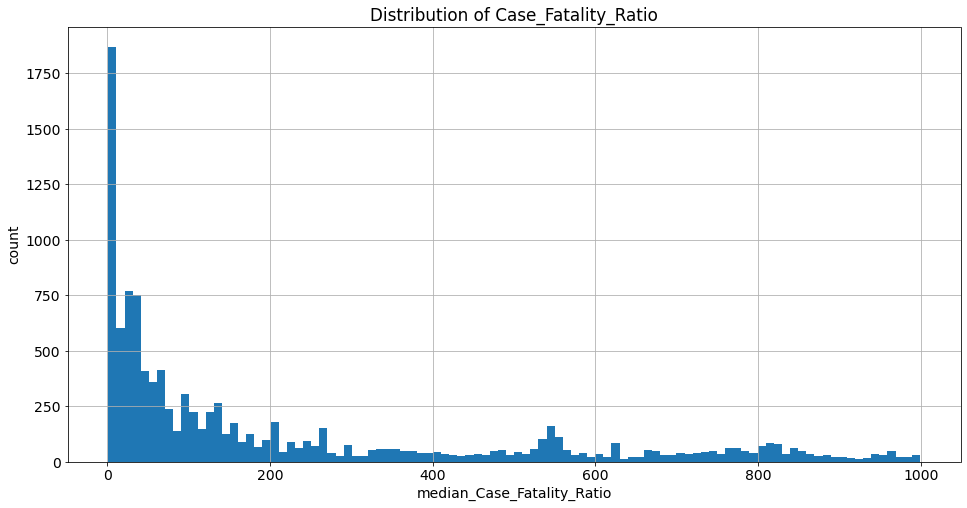

In [74]:
# 'o3', 'pm25', 'no2', 'pressure', 'wind-speed', 'co', 'temperature', 
#'pm10', 'dew', 'humidity', 'so2', 'wind-gust', 'precipitation',
#'wd', 'uvi', 'aqi'


# 'count', 'min', 'max', 'median', 'variance'
print(len(df))
# df['Day_increase_Deaths'] = df['Day_increase_Deaths'].fillna(0)
df['Deaths'] = df['Deaths'].replace({'0':np.nan, 0:np.nan})
df = df.loc[df['Deaths'] <1000]
print(len(df))
# df = df.loc[(df['Day_increase_Deaths'] > 1) & (df['Day_increase_Deaths'] < 200) ]
# df = df.loc[(df['Day_increase_Deaths'] > 100)]
plt.figure(figsize = (16, 8))

df['Deaths'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('median_Case_Fatality_Ratio')

plt.title('Distribution of Case_Fatality_Ratio')
plt.show()

In [24]:
# убираем выбросы по Day_increase_Recovered
df['Day_increase_Recovered'].describe()

count    10983.000000
mean       426.965674
std       2715.357739
min       -600.000000
25%          0.000000
50%          0.000000
75%         61.500000
max      76086.000000
Name: Day_increase_Recovered, dtype: float64

In [25]:
# df = df.loc[~(df['Day_increase_Deaths'] < -100) & ~(df['Day_increase_Deaths'] > 1000)]

In [26]:
# df.loc[(df['Day_increase_Recovered'] < 0), 'Day_increase_Deaths'] = 0

In [27]:
df.loc[(df['Day_increase_Active'] > 20000)]

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance
10300,2021-06-13,1623531600,BR,Brazil,São Paulo,3449577,117887,3075383.0,256307.0,7512.300614,3.417433,-23.5505,-46.6333,São Paulo_BR_1623531600,543.0,0.0,20678.0,648.0,55.5,92.7,82.0,1057.16,111.0,0.6,4.6,1.1,3.97,376.0,5.0,282.0,30.0,6601.12,648.0,1015.4,1026.9,1024.1,73.56,255.0,1.0,29.8,6.0,306.21,171.0,1.0,8.2,1.9,30.94,648.0,1.4,8.0,4.1,17.67,476.0,1.0,71.0,12.0,553.26,264.0,2.0,11.0,7.0,37.07,208.0,9.0,11.0,10.0,3.81,648.0,11.0,22.4,13.0,48.84,426.0,5.3,36.6,17.9,267.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10683,2021-06-19,1624050000,BR,Brazil,São Paulo,3552727,121238,3145406.0,286083.0,7736.935057,3.412534,-23.5505,-46.6333,São Paulo_BR_1624050000,714.0,0.0,26992.0,624.0,65.8,94.6,87.0,601.62,125.0,0.6,5.6,1.1,6.53,370.0,5.0,163.0,55.0,7254.66,624.0,1020.0,1029.4,1023.0,59.99,256.0,3.2,36.6,13.3,453.09,221.0,1.0,17.2,4.6,103.76,582.0,0.1,5.8,3.0,15.07,479.0,1.0,89.0,21.0,2306.70,252.0,0.3,7.7,4.5,40.91,180.0,12.0,15.0,13.0,7.54,624.0,5.3,19.4,16.0,77.46,384.0,0.5,28.5,10.6,313.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10939,2021-06-23,1624395600,BR,Brazil,São Paulo,3610743,123101,3192471.0,295171.0,7863.279137,3.409298,-23.5505,-46.6333,São Paulo_BR_1624395600,843.0,0.0,22254.0,600.0,67.0,98.0,87.0,618.50,92.0,0.6,13.2,0.6,47.71,359.0,5.0,85.0,25.0,3349.88,600.0,1010.5,1027.7,1025.0,122.76,256.0,0.5,32.0,11.0,552.77,224.0,1.0,15.4,2.8,74.95,597.0,0.1,8.4,3.6,20.50,467.0,1.0,63.0,10.0,789.02,240.0,1.0,11.1,6.0,56.68,225.0,11.0,13.0,12.0,2.76,600.0,12.7,18.0,14.0,21.59,394.0,1.7,26.4,13.0,234.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11132,2021-06-26,1624654800,BR,Brazil,São Paulo,3669196,125378,3215161.0,328657.0,7990.574892,3.417043,-23.5505,-46.6333,São Paulo_BR_1624654800,772.0,0.0,20222.0,624.0,44.0,100.0,68.2,3319.38,133.0,0.6,6.6,1.1,7.93,360.0,5.0,175.0,82.0,10017.40,624.0,1014.0,1023.5,1021.0,47.31,254.0,0.5,54.7,21.5,1189.73,246.0,1.9,46.1,6.4,388.99,607.0,0.2,6.4,2.3,9.47,478.0,3.0,96.0,40.0,2379.71,592.0,0.5,13.8,2.8,67.05,345.0,13.0,15.0,14.0,3.80,624.0,7.3,26.0,21.0,255.05,365.0,0.5,51.3,11.4,1545.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# df['Day_increase_Deaths'].describe()

In [29]:
df.loc[(df['Day_increase_Deaths'] < 0) ]

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_wind-speed_Count,Specie_wind-speed_Min,Specie_wind-speed_Max,Specie_wind-speed_Median,Specie_wind-speed_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_wind-gust_Count,Specie_wind-gust_Min,Specie_wind-gust_Max,Specie_wind-gust_Median,Specie_wind-gust_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance


In [30]:
# df.loc[(df['Day_increase_Deaths'] > 300) ]

In [31]:
df['Day_increase_Recovered'] = df['Day_increase_Recovered'].fillna(0)
df['Day_increase_Active'] = df['Day_increase_Active'].fillna(0)

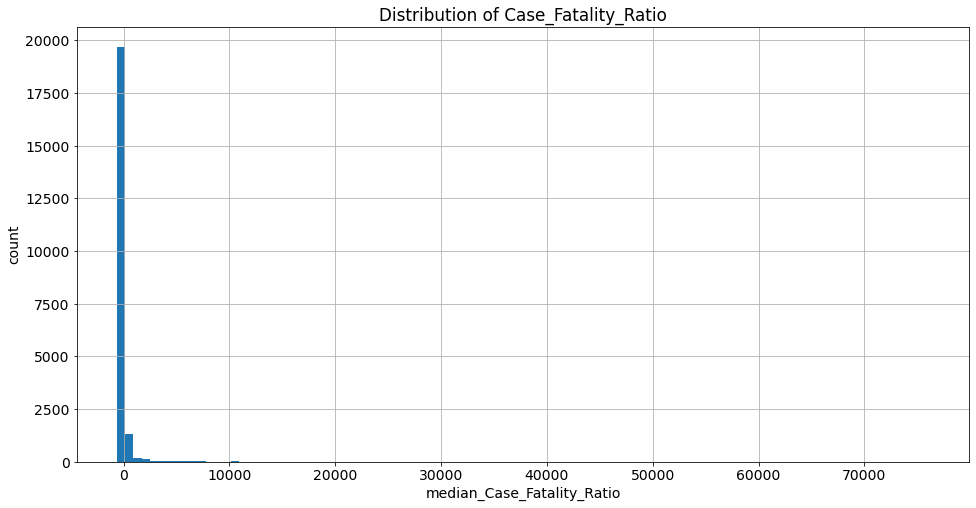

In [32]:
# 'o3', 'pm25', 'no2', 'pressure', 'wind-speed', 'co', 'temperature', 
#'pm10', 'dew', 'humidity', 'so2', 'wind-gust', 'precipitation',
#'wd', 'uvi', 'aqi'


# 'count', 'min', 'max', 'median', 'variance'

# df['Day_increase_Deaths'] = df['Day_increase_Deaths'].fillna(0)
# df['Day_increase_Deaths'] = df['Day_increase_Deaths'].replace({'0':np.nan, 0:np.nan})
# df = df.loc[(df['Day_increase_Deaths'] > 1) & (df['Day_increase_Deaths'] < 200) ]
# df = df.loc[(df['Day_increase_Deaths'] > 100)]
plt.figure(figsize = (16, 8))

df['Day_increase_Recovered'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('median_Case_Fatality_Ratio')

plt.title('Distribution of Case_Fatality_Ratio')
plt.show()

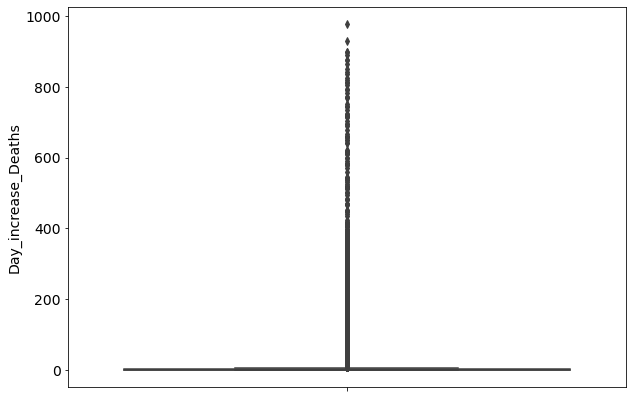

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# df = sns.load_dataset('iris')
df.head()
fig = plt.figure(figsize =(10, 7))
sns.boxplot( y=df["Day_increase_Deaths"] );
plt.show()
 

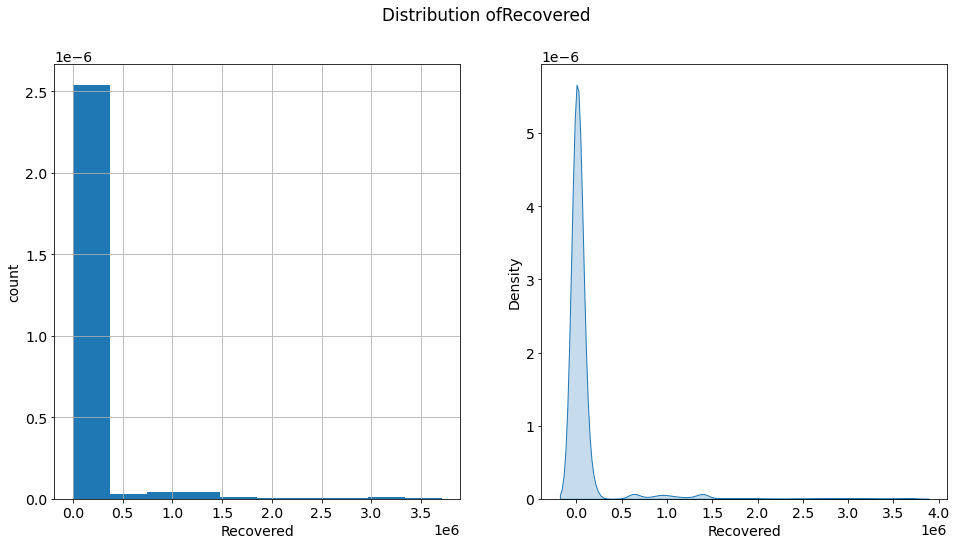

In [34]:
name_for_hist = 'Recovered'
plt.figure(figsize = (16, 8))

plt.subplot(121)
df[name_for_hist].hist(density=True)
plt.ylabel('count')
plt.xlabel(name_for_hist)

plt.subplot(122)
sns.kdeplot(df['Recovered'], shade=True, legend=False)
plt.xlabel(name_for_hist)

plt.suptitle(str('Distribution of' + name_for_hist))
plt.show()

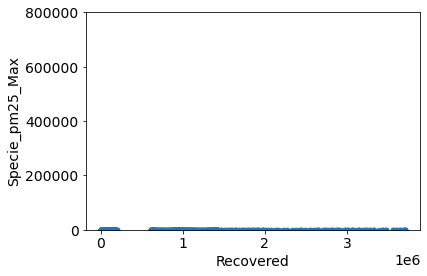

In [35]:
#scatter plot Square/price
var = 'Recovered'
data = pd.concat([df['Specie_pm25_Max'], df[var]], axis=1)
data.plot.scatter(x=var, y='Specie_pm25_Max', ylim=(0,800000));

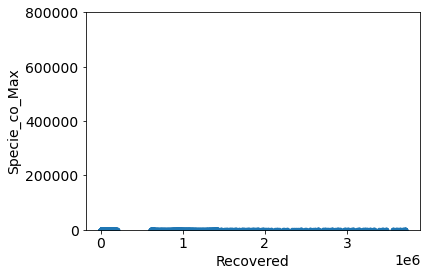

In [36]:
#scatter plot Square/price
var = 'Recovered'
data = pd.concat([df['Specie_co_Max'], df[var]], axis=1)
data.plot.scatter(x=var, y='Specie_co_Max', ylim=(0,800000));

In [37]:
# plt.figure(figsize = (15,10))

# sns.set(font_scale=1.4)

# corr_matrix = df.corr()
# corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0

# sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

# plt.title('Correlation matrix')
# plt.show()

In [38]:
df.columns

Index(['Date', 'Absolute_time', 'Dugramm', 'Country_name', 'City', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_rate', 'Case_fatality_ratio',
       'Lat', 'Long_', 'Main_key', 'Day_increase_Deaths',
       'Day_increase_Recovered', 'Day_increase_Active',
       'Specie_humidity_Count', 'Specie_humidity_Min', 'Specie_humidity_Max',
       'Specie_humidity_Median', 'Specie_humidity_Variance',
       'Specie_so2_Count', 'Specie_so2_Min', 'Specie_so2_Max',
       'Specie_so2_Median', 'Specie_so2_Variance', 'Specie_pm25_Count',
       'Specie_pm25_Min', 'Specie_pm25_Max', 'Specie_pm25_Median',
       'Specie_pm25_Variance', 'Specie_pressure_Count', 'Specie_pressure_Min',
       'Specie_pressure_Max', 'Specie_pressure_Median',
       'Specie_pressure_Variance', 'Specie_no2_Count', 'Specie_no2_Min',
       'Specie_no2_Max', 'Specie_no2_Median', 'Specie_no2_Variance',
       'Specie_co_Count', 'Specie_co_Min', 'Specie_co_Max', 'Specie_co_Median',
       'Specie_co_Variance',

In [39]:
# работаем с выбросами по данным Pollutuion

#MIN
median_o3_Min = df['Specie_o3_Min'].median()
# df = df[df['Specie_o3_Min'] <= 40]
df.loc[df['Specie_o3_Min'] > 30, 'Specie_o3_Min'] =  median_o3_Min

median_pm25_Min = df['Specie_pm25_Min'].median()
# df = df[df['Specie_pm25_Min'] <= 200]
df.loc[df['Specie_pm25_Min'] > 190, 'Specie_pm25_Min'] =  median_pm25_Min

median_no2_Min = df['Specie_no2_Min'].median()
df.loc[df['Specie_no2_Min'] > 15, 'Specie_no2_Min'] =  median_no2_Min
# df = df[df['Specie_no2_Min'] <= 50]

median_pressure_Min = df['Specie_pressure_Min'].median()
# print(median_pressure_Min)
df.loc[df['Specie_pressure_Min'] < 850, 'Specie_pressure_Min'] =  median_pressure_Min

median_wind_speed_Min = df['Specie_wind-speed_Min'].median()
df.loc[df['Specie_wind-speed_Min'] > 10, 'Specie_wind-speed_Min'] =  median_wind_speed_Min

df.loc[(df['Specie_temperature_Min'] < - 20) & (df['Specie_temperature_Max'] > 0), 'Specie_temperature_Min' ] = df['Specie_temperature_Min'] / 10
df.loc[(df['Specie_temperature_Min'] < - 25) & (df['Specie_temperature_Max'] > -10), 'Specie_temperature_Min' ] = df['Specie_temperature_Min'] / 10

median_dew_Min = df['Specie_dew_Min'].median()
df.loc[df['Specie_dew_Min'] < -25, 'Specie_dew_Min'] = median_dew_Min

median_humidity_Min = df['Specie_humidity_Min'].median()
df.loc[df['Specie_humidity_Min'] < 1, 'Specie_humidity_Min'] = median_humidity_Min
df.loc[(df['Specie_humidity_Min'] < 3) & (df['Specie_humidity_Max'] > 90), 'Specie_humidity_Min'] = median_humidity_Min

median_so2_Min = df['Specie_so2_Min'].median()
df.loc[(df['Specie_so2_Min'] > 5), 'Specie_so2_Min'] = median_so2_Min

median_precipitation_Min = df['Specie_precipitation_Min'].median()
df.loc[(df['Specie_precipitation_Min'] < 0), 'Specie_precipitation_Min'] = median_precipitation_Min


# MAX
median_o3_Max = df['Specie_o3_Max'].median()
df.loc[(df['Specie_o3_Max'] >120), 'Specie_o3_Max'] = median_o3_Max

median_pm25_Max = df['Specie_pm25_Max'].median()
df.loc[(df['Specie_pm25_Max'] > 200) & (df['Specie_pm25_Min'] < median_pm25_Max), 'Specie_pm25_Max'] = median_pm25_Max
# df = df[df['Specie_pm25_Max'] <= 400]


median_no2_Max = df['Specie_no2_Max'].median()
df.loc[(df['Specie_no2_Max'] > 150) & (df['Specie_no2_Min'] < median_no2_Max), 'Specie_no2_Max'] = median_no2_Max

median_pressure_Max = df['Specie_pressure_Max'].median()
df.loc[(df['Specie_pressure_Max'] >1070) | (df['Specie_pressure_Max'] < 950) & (df['Specie_pressure_Min'] < median_pressure_Max), 'Specie_pressure_Max'] = median_pressure_Max

median_wind_speed_Max = df['Specie_wind-speed_Max'].median()
df.loc[(df['Specie_wind-speed_Max'] > 40) & (df['Specie_wind-speed_Min'] < median_wind_speed_Max), 'Specie_wind-speed_Max'] = median_wind_speed_Max

median_co_Max = df['Specie_co_Max'].median()
df.loc[(df['Specie_co_Max'] > 80)  & (df['Specie_co_Min'] < median_co_Max), 'Specie_co_Max'] = median_co_Max
df.loc[(df['Specie_co_Max'] > 80), 'Specie_co_Max'] = df['Specie_co_Max'] /10

median_temperature_Max = df['Specie_temperature_Max'].median()
df.loc[(df['Specie_temperature_Max'] > 55)  & (df['Specie_temperature_Min'] < median_temperature_Max), 'Specie_temperature_Max'] = median_temperature_Max
df.loc[(df['Specie_temperature_Max'] > 55), 'Specie_temperature_Max'] = df['Specie_temperature_Min'] +10


median_pm10_Max = df['Specie_pm10_Max'].median()
df.loc[(df['Specie_pm10_Max'] > 200)  & (df['Specie_pm10_Min'] < median_pm10_Max), 'Specie_pm10_Max'] = median_pm10_Max
df.loc[(df['Specie_pm10_Max'] > 200), 'Specie_pm10_Max'] = df['Specie_pm10_Min'] * 2
df.loc[(df['Specie_pm10_Max'] > 200), 'Specie_pm10_Max'] = 200


median_dew_Max = df['Specie_dew_Max'].median()
df.loc[(df['Specie_dew_Max'] > 30)| (df['Specie_dew_Max'] < -20)  & (df['Specie_dew_Min'] < median_dew_Max), 'Specie_dew_Max'] = median_dew_Max
df.loc[(df['Specie_dew_Max'] > 30), 'Specie_dew_Max'] = df['Specie_dew_Min'] *1.1

median_humidity_Max = df['Specie_humidity_Max'].median()
df.loc[(df['Specie_humidity_Max'] > 101) & (df['Specie_humidity_Min'] < median_humidity_Max), 'Specie_humidity_Max'] = median_humidity_Max

median_so2_Max = df['Specie_so2_Max'].median()
df.loc[(df['Specie_so2_Max'] > 60)  & (df['Specie_so2_Min'] <= median_so2_Max), 'Specie_so2_Max'] = median_so2_Max
df.loc[(df['Specie_so2_Max'] > 60),'Specie_so2_Max'] = df['Specie_so2_Min'] *2

median_wind_gust_Max = df['Specie_wind-gust_Max'].median()
df.loc[(df['Specie_wind-gust_Max'] > 50) & (df['Specie_wind-gust_Min'] <= median_wind_gust_Max), 'Specie_wind-gust_Max'] = median_wind_gust_Max

df.loc[(df['Specie_precipitation_Max'] > 100) , 'Specie_precipitation_Max'] = 100

df.loc[(df['Specie_o3_Median'] > df['Specie_o3_Max']), 'Specie_o3_Median'] = (df['Specie_o3_Min'] + df['Specie_o3_Max']) / 2

# MEDIAN
median_pm25_Median = df['Specie_pm25_Median'].median()
df.loc[(df['Specie_pm25_Median'] >= df['Specie_pm25_Max'] ), 'Specie_pm25_Median'] = (df['Specie_pm25_Min'] + df['Specie_pm25_Max']) / 2
df.loc[(df['Specie_pm25_Median'] >= 200 )& (df['Specie_pm25_Max'] <= median_pm25_Median), 'Specie_pm25_Median'] = median_pm25_Median
# df = df[df['Specie_pm25_Median'] <= 200]

# df = df.loc[(df['Specie_no2_Median'] <= 40)]

df.loc[(df['Specie_pressure_Median'] < df['Specie_pressure_Max']), 'Specie_pressure_Median'] =(df['Specie_pressure_Min'] + df['Specie_pressure_Max']) / 2

df.loc[(df['Specie_wind-speed_Median'] > df['Specie_wind-speed_Max']), 'Specie_wind-speed_Median'] = (df['Specie_wind-speed_Min'] + df['Specie_wind-speed_Max']) / 2


# df = df.loc[(df['Specie_co_Median'] < 20)  ]

df.loc[(df['Specie_temperature_Median'] > df['Specie_temperature_Max']), 'Specie_temperature_Median'] = (df['Specie_temperature_Min'] + df['Specie_temperature_Max']) / 2
df.loc[(df['Specie_temperature_Median'] < df['Specie_temperature_Min']), 'Specie_temperature_Median'] = (df['Specie_temperature_Min'] + df['Specie_temperature_Max']) / 2

df.loc[(df['Specie_pm10_Median'] > df['Specie_pm10_Max']), 'Specie_pm10_Median'] = (df['Specie_pm10_Min'] + df['Specie_pm10_Max']) / 2

df.loc[(df['Specie_dew_Median'] > df['Specie_dew_Max']), 'Specie_dew_Median'] = (df['Specie_dew_Min'] + df['Specie_dew_Max']) / 2
df.loc[(df['Specie_dew_Median'] < df['Specie_dew_Min']), 'Specie_dew_Median'] = (df['Specie_dew_Min'] + df['Specie_dew_Max']) / 2

df.loc[(df['Specie_humidity_Median'] < 15), 'Specie_humidity_Median'] = (df['Specie_humidity_Min'] + df['Specie_humidity_Max']) / 2
df.loc[(df['Specie_humidity_Median'] > df['Specie_humidity_Max']),'Specie_humidity_Median'] = (df['Specie_humidity_Min'] + df['Specie_humidity_Max']) / 2
df.loc[(df['Specie_humidity_Median'] < df['Specie_humidity_Min']),'Specie_humidity_Median'] = (df['Specie_humidity_Min'] + df['Specie_humidity_Max']) / 2

df.loc[(df['Specie_so2_Median'] > df['Specie_so2_Max']),'Specie_so2_Median'] = (df['Specie_so2_Min'] + df['Specie_so2_Max']) / 2
df.loc[(df['Specie_so2_Median'] < df['Specie_so2_Min']),'Specie_so2_Median'] = (df['Specie_so2_Min'] + df['Specie_so2_Max']) / 2
df.loc[(df['Specie_so2_Median'] >20),'Specie_so2_Median'] = (df['Specie_so2_Min'] + df['Specie_so2_Max']) / 2

df.loc[(df['Specie_wind-gust_Median'] > df['Specie_wind-gust_Max']),'Specie_wind-gust_Median'] = (df['Specie_wind-gust_Min'] + df['Specie_wind-gust_Max']) / 2

# VARIANCE
median_o3_Variance = df['Specie_o3_Variance'].median()
df.loc[(df['Specie_o3_Variance'] > 10000), 'Specie_o3_Variance'] = median_o3_Variance

median_o3_Variance = df['Specie_o3_Variance'].median()
df.loc[(df['Specie_o3_Variance'] > 5000), 'Specie_o3_Variance'] = median_o3_Variance
median_o3_Variance = df['Specie_o3_Variance'].median()
df.loc[(df['Specie_o3_Variance'] > 4000), 'Specie_o3_Variance'] = median_o3_Variance

median_pm25_Variance = df['Specie_pm25_Variance'].median()
df.loc[(df['Specie_pm25_Variance'] > 9000), 'Specie_pm25_Variance'] = median_pm25_Variance

median_no2_Variance = df['Specie_no2_Variance'].median()
df.loc[(df['Specie_no2_Variance'] > 1600), 'Specie_no2_Variance'] = median_no2_Variance

median_pressure_Variance = df['Specie_pressure_Variance'].median()
df.loc[(df['Specie_pressure_Variance'] > 600),  'Specie_pressure_Variance' ] = median_pressure_Variance

median_wind_speed_Variance = df['Specie_wind-speed_Variance'].median()
df.loc[(df['Specie_wind-speed_Variance'] >175), 'Specie_wind-speed_Variance'  ] = median_wind_speed_Variance

median_co_Variance = df['Specie_co_Variance'].median()
df.loc[(df['Specie_co_Variance'] >100), 'Specie_co_Variance'] = median_co_Variance

median_temperature_Variance = df['Specie_temperature_Variance'].median()
df.loc[(df['Specie_temperature_Variance'] >600), 'Specie_temperature_Variance'] =median_temperature_Variance

median_pm10_Variance = df['Specie_temperature_Variance'].median()
df.loc[(df['Specie_pm10_Variance'] >3000), 'Specie_pm10_Variance'] = median_pm10_Variance

median_dew_Variance = df['Specie_dew_Variance'].median()
df.loc[(df['Specie_dew_Variance'] >200, 'Specie_dew_Variance')  ] = median_dew_Variance


median_humidity_Variance = df['Specie_humidity_Variance'].median()
df.loc[(df['Specie_humidity_Variance'] >6000), 'Specie_humidity_Variance'  ] =median_humidity_Variance


median_so2_Variance = df['Specie_so2_Variance'].median()
df.loc[(df['Specie_so2_Variance'] >50), 'Specie_so2_Variance'  ] =median_so2_Variance

median_wind_gust_Variance = df['Specie_wind-gust_Variance'].median()
df.loc[(df['Specie_wind-gust_Variance'] >600), 'Specie_wind-gust_Variance'] =median_wind_gust_Variance

median_precipitation_Variance = df['Specie_precipitation_Variance'].median()
df.loc[(df['Specie_precipitation_Variance'] >30000), 'Specie_precipitation_Variance'  ] = median_precipitation_Variance

# median_Deaths = df['Deaths'].median()
# df.loc[(df['Deaths'] >= 5000), 'Deaths' ] = median_Deaths
# df = df[df['Deaths'] <= 20000]
# df.loc[(df['Deaths'] == 0), 'Deaths'] = 1
# df.loc[(df['Recovered'] == 0), 'Recovered'] = 1
# median_Deaths




In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21579 entries, 0 to 21596
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           21579 non-null  object 
 1   Absolute_time                  21579 non-null  int64  
 2   Dugramm                        21579 non-null  object 
 3   Country_name                   21579 non-null  object 
 4   City                           21579 non-null  object 
 5   Confirmed                      21579 non-null  int64  
 6   Deaths                         21579 non-null  int64  
 7   Recovered                      11043 non-null  float64
 8   Active                         11043 non-null  float64
 9   Incident_rate                  21579 non-null  float64
 10  Case_fatality_ratio            21579 non-null  float64
 11  Lat                            21579 non-null  float64
 12  Long_                          21579 non-null 

In [41]:
# 
columns = df.columns

figure_columns = df[columns].select_dtypes(include=['float32', 'float16', 'int8', 'int16', 'float64' ]).columns.tolist()
# figure_columns
category_columns = df[columns].select_dtypes(include=['object']).columns.tolist()
# category_columns

In [42]:
# значения NAN в числовых колонках меняем на медианные
for i in figure_columns:
#     print(i)
    df.replace([np.inf, -np.inf], np.nan).dropna(subset=[i], how="all")
    median = df[i].median()
    df[i].fillna(median, inplace=True)
    if 'wind-speed' in i:
        new_name = i.replace('wind-speed', 'wind_speed')
        df[new_name] = df[i]
        df = df.drop(i, 1)
    if 'wind-gust' in i:
        new_name = i.replace('wind-gust', 'wind_gust')
        df[new_name] = df[i]
        df = df.drop(i, 1)

In [43]:
# значения NAN в категорийных колонках меняем на 'No_value'
for i in category_columns:
#     print(i)
#     df.replace([np.inf, -np.inf], np.nan).dropna(subset=[i], how="all")
    replace_value = 'No_value'
    df[i].fillna(replace_value, inplace=True)

In [44]:
category_columns

['Date', 'Dugramm', 'Country_name', 'City', 'Main_key']

In [45]:
df.loc[df['City'] == 'Moscow']

,Date,Absolute_time,Dugramm,Country_name,City,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Main_key,Day_increase_Deaths,Day_increase_Recovered,Day_increase_Active,Specie_humidity_Count,Specie_humidity_Min,Specie_humidity_Max,Specie_humidity_Median,Specie_humidity_Variance,Specie_so2_Count,Specie_so2_Min,Specie_so2_Max,Specie_so2_Median,Specie_so2_Variance,Specie_pm25_Count,Specie_pm25_Min,Specie_pm25_Max,Specie_pm25_Median,Specie_pm25_Variance,Specie_pressure_Count,Specie_pressure_Min,Specie_pressure_Max,Specie_pressure_Median,Specie_pressure_Variance,Specie_no2_Count,Specie_no2_Min,Specie_no2_Max,Specie_no2_Median,Specie_no2_Variance,Specie_co_Count,Specie_co_Min,Specie_co_Max,Specie_co_Median,Specie_co_Variance,Specie_pm10_Count,Specie_pm10_Min,Specie_pm10_Max,Specie_pm10_Median,Specie_pm10_Variance,Specie_dew_Count,Specie_dew_Min,Specie_dew_Max,Specie_dew_Median,Specie_dew_Variance,Specie_temperature_Count,Specie_temperature_Min,Specie_temperature_Max,Specie_temperature_Median,Specie_temperature_Variance,Specie_o3_Count,Specie_o3_Min,Specie_o3_Max,Specie_o3_Median,Specie_o3_Variance,Specie_precipitation_Count,Specie_precipitation_Min,Specie_precipitation_Max,Specie_precipitation_Median,Specie_precipitation_Variance,Specie_wd_Count,Specie_wd_Min,Specie_wd_Max,Specie_wd_Median,Specie_wd_Variance,Specie_wind_speed_Count,Specie_wind_speed_Min,Specie_wind_speed_Max,Specie_wind_speed_Median,Specie_wind_speed_Variance,Specie_wind_gust_Count,Specie_wind_gust_Min,Specie_wind_gust_Max,Specie_wind_gust_Median,Specie_wind_gust_Variance
9,2021-01-02,1609534800,RU,Russia,Moscow,815676,11280,633702.0,170694.0,6522.033239,1.382902,55.750446,37.617494,Moscow_RU_1609534800,0.0,0.0,0.0,383.0,71.6,100.0,83.0,380.88,250.0,0.1,4.2,0.9,6.23,381.0,9.0,76.0,59.0,2328.49,383.0,1000.4,1021.0,1010.70,239.76,312.0,3.6,31.3,11.2,350.59,335.0,0.3,10.0,2.8,30.02,315.0,2.0,32.0,17.0,390.7200,30.0,-2.0,1.0,-1.0,5.13,383.0,-1.0,2.0,0.5,5.27,211.0,0.2,21.5,10.6,428.67,20.0,1.2,99.0,99.0,0.61,160.0,6.0,352.9,173.0,65904.1,271.0,0.5,7.4,2.0,52.76,336.0,0.1,14.2,4.0,172.19
69,2021-01-03,1609621200,RU,Russia,Moscow,821128,11356,639809.0,169963.0,6565.626682,1.382976,55.750446,37.617494,Moscow_RU_1609621200,76.0,6107.0,-731.0,370.0,64.5,100.0,74.2,735.83,241.0,0.1,4.1,0.9,5.74,360.0,5.0,68.0,30.0,2463.31,370.0,1008.0,1028.0,1018.00,255.22,307.0,3.6,31.0,13.0,392.54,337.0,0.3,8.5,2.5,27.44,342.0,1.0,24.0,9.0,253.4800,42.0,-3.0,1.0,-1.0,11.28,370.0,-1.0,1.6,1.1,3.58,214.0,0.3,21.4,7.9,347.62,20.0,1.2,99.0,99.0,0.61,160.0,6.0,352.9,173.0,65904.1,328.0,0.1,5.6,3.6,30.26,322.0,1.4,10.0,6.6,88.02
129,2021-01-04,1609707600,RU,Russia,Moscow,824979,11433,645923.0,167623.0,6596.418749,1.385853,55.750446,37.617494,Moscow_RU_1609707600,77.0,6114.0,-2340.0,383.0,76.0,100.0,79.0,336.10,242.0,0.1,4.0,0.9,6.29,373.0,13.0,117.0,55.0,2806.03,383.0,1012.1,1028.0,1020.05,213.25,310.0,3.8,30.3,14.4,362.98,330.0,0.3,29.0,2.8,38.94,352.0,3.0,40.0,16.0,590.0000,22.0,-3.0,0.0,-2.0,10.37,383.0,-2.0,1.1,0.0,4.94,213.0,0.3,21.4,10.4,318.46,20.0,1.2,99.0,99.0,0.61,160.0,6.0,352.9,173.0,65904.1,383.0,0.1,4.6,1.0,8.73,336.0,1.8,6.4,3.0,12.49
189,2021-01-05,1609794000,RU,Russia,Moscow,828570,11507,652324.0,164739.0,6625.131892,1.388778,55.750446,37.617494,Moscow_RU_1609794000,74.0,6401.0,-2884.0,383.0,71.2,100.0,80.0,343.57,254.0,0.1,3.5,0.9,4.38,382.0,5.0,87.0,55.0,3377.81,383.0,1011.5,1028.0,1019.75,221.23,312.0,6.6,35.8,17.9,226.14,324.0,0.3,7.0,2.5,18.25,360.0,2.0,36.0,18.0,703.6100,31.0,-4.5,-1.0,-3.0,9.31,383.0,-3.0,0.5,-0.5,5.14,211.0,0.2,18.1,5.2,218.36,20.0,1.2,99.0,99.0,0.61,160.0,6.0,352.9,173.0,65904.1,355.0,0.1,4.6,0.8,8.98,336.0,1.7,6.0,2.3,19.52
249,2021-01-06,1609880400,RU,Russia,Moscow,833412,11582,659076.0,162754.0,6663.847859,1.389709,55.750446,37.617494,Moscow_RU_1609880400,75.0,6752.0,-1985.0,384.0,61.0,96.0,70.0,597.70,262.0,0.1,4.0,1.2,4.54,382.0,9.0,80.0,46.0,1780.96,384.0,1007.4,1026.0,1016.70,236.81,312.0,4.4,40.9,17.6,639.19,328.0,0.2,7

In [46]:
# смотрим на результат - пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21579 entries, 0 to 21596
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           21579 non-null  object 
 1   Absolute_time                  21579 non-null  int64  
 2   Dugramm                        21579 non-null  object 
 3   Country_name                   21579 non-null  object 
 4   City                           21579 non-null  object 
 5   Confirmed                      21579 non-null  int64  
 6   Deaths                         21579 non-null  int64  
 7   Recovered                      21579 non-null  float64
 8   Active                         21579 non-null  float64
 9   Incident_rate                  21579 non-null  float64
 10  Case_fatality_ratio            21579 non-null  float64
 11  Lat                            21579 non-null  float64
 12  Long_                          21579 non-null 

In [47]:
df.to_csv('prepared_COV_POL_dataset_2.csv', index=False)

# Строим матрицу корреляции

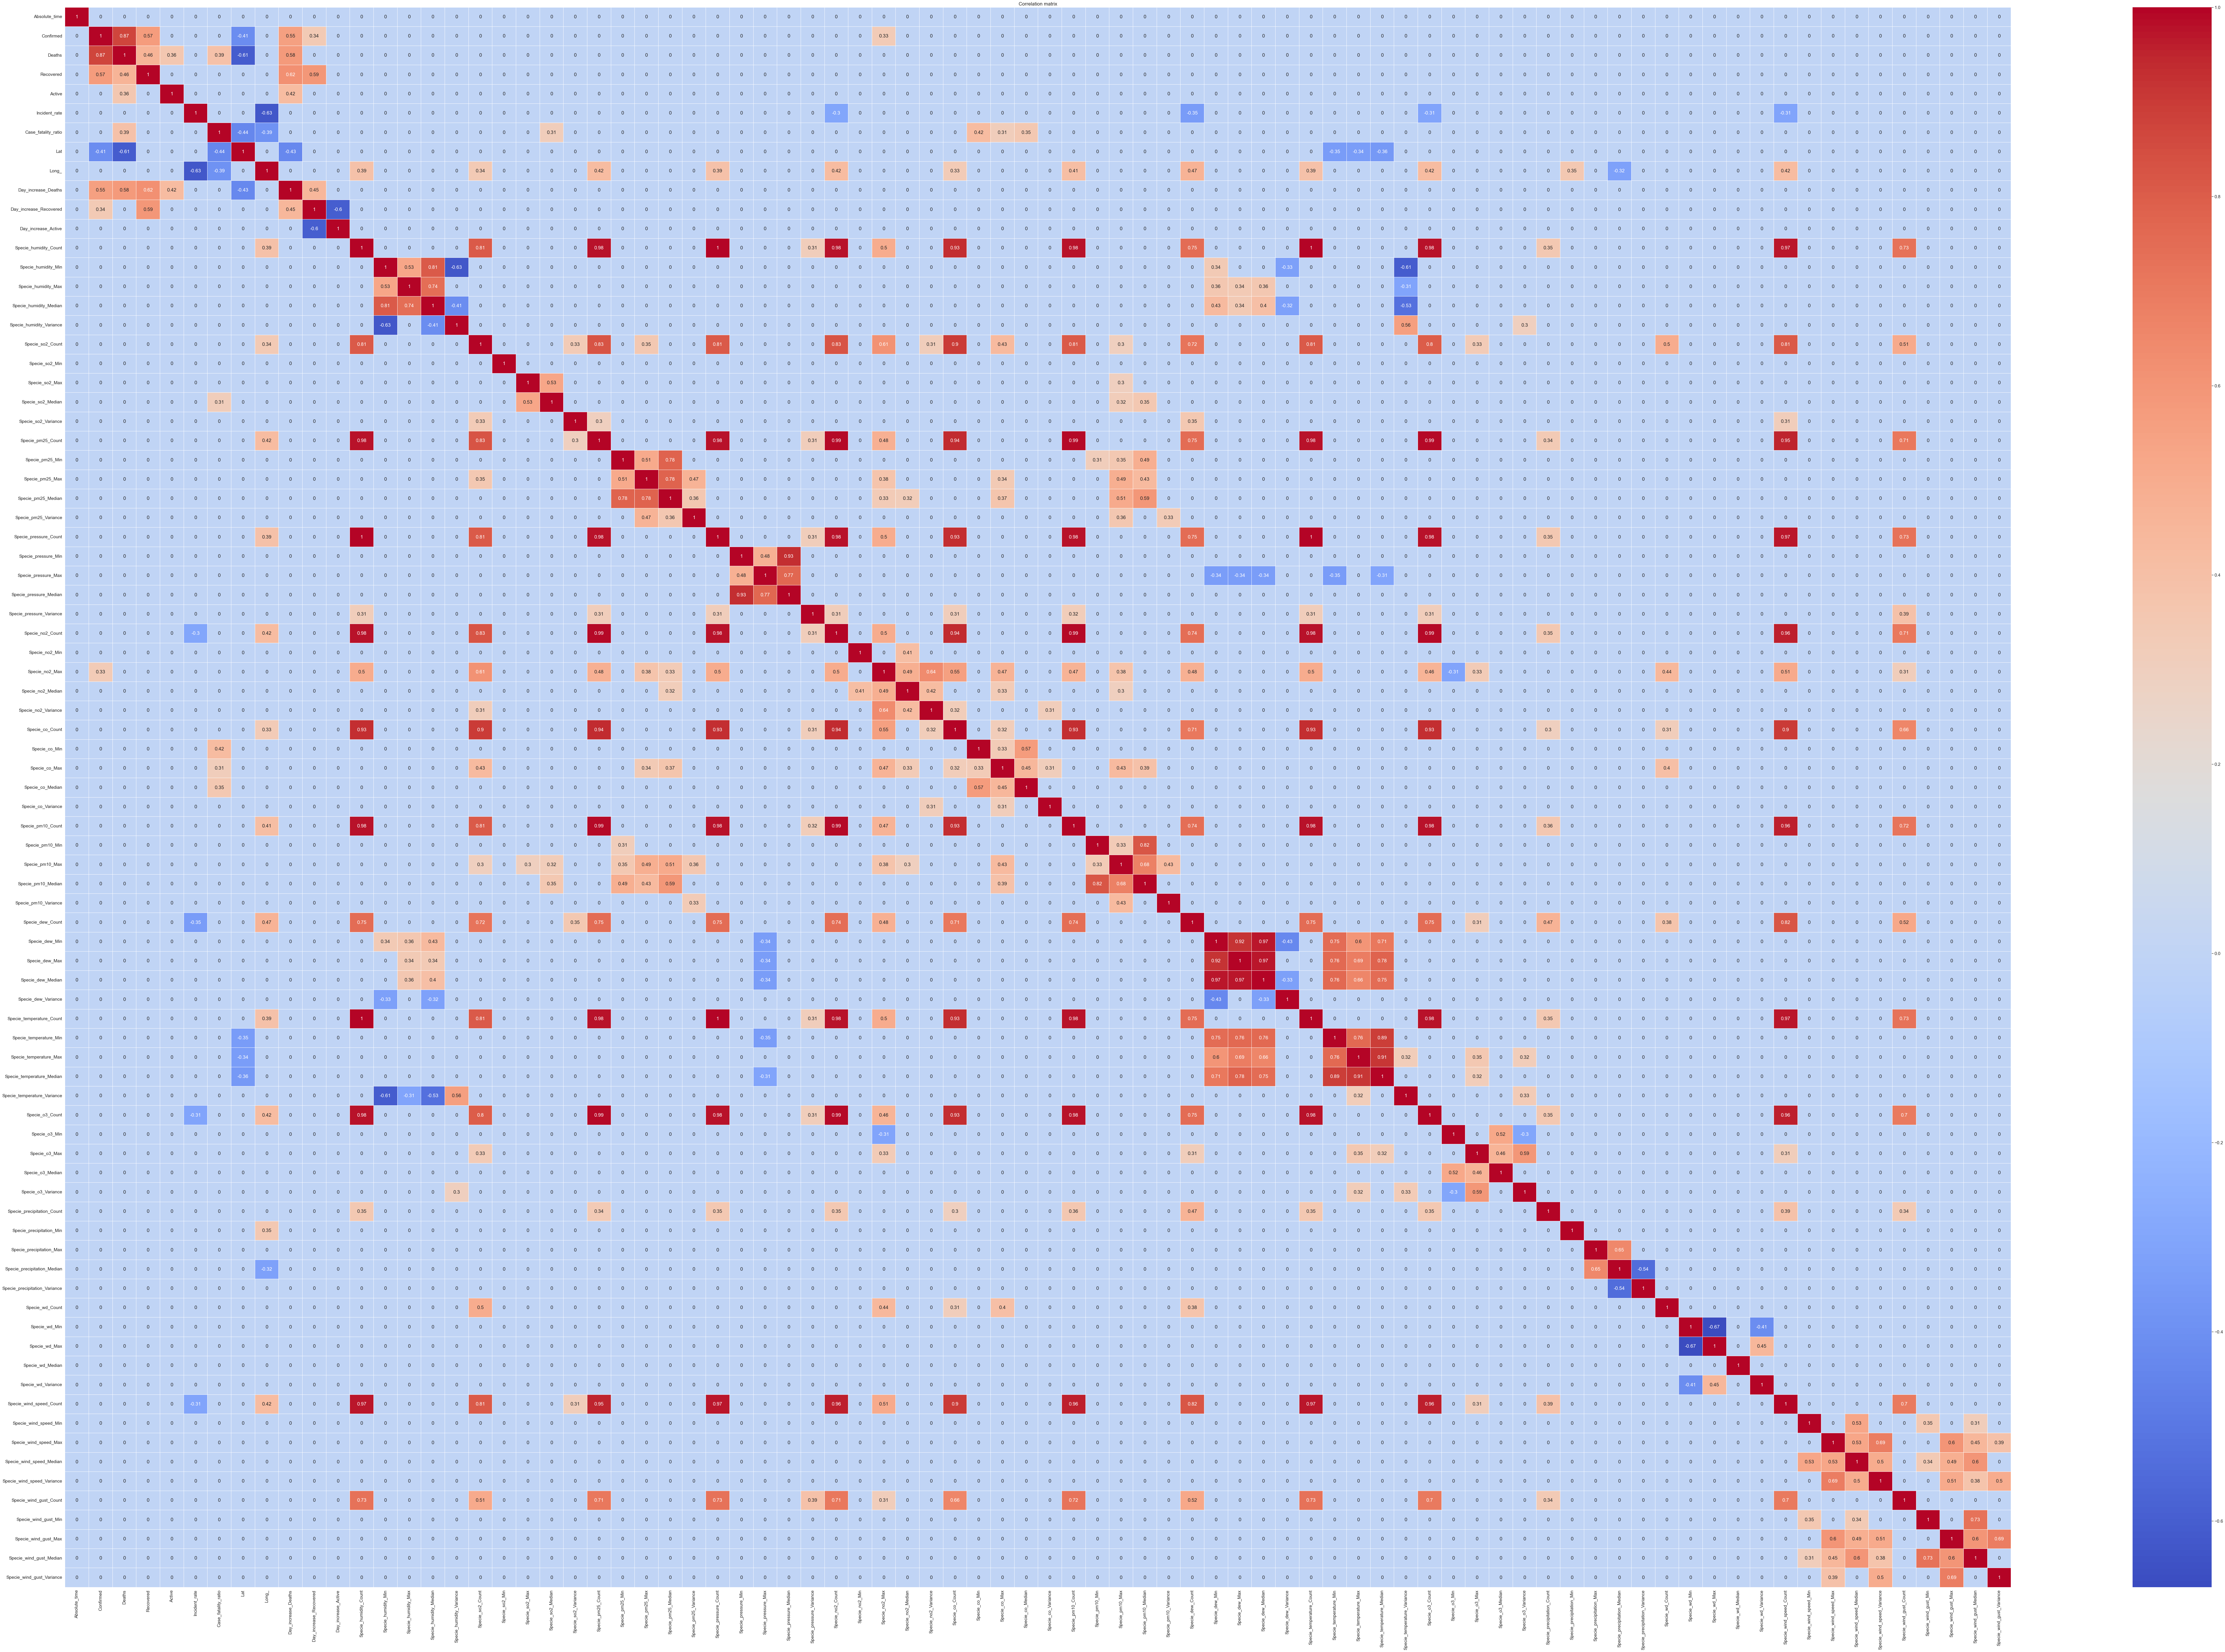

In [74]:
plt.figure(figsize = (150,100))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [49]:
df.columns

Index(['Date', 'Absolute_time', 'Dugramm', 'Country_name', 'City', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_rate', 'Case_fatality_ratio',
       'Lat', 'Long_', 'Main_key', 'Day_increase_Deaths',
       'Day_increase_Recovered', 'Day_increase_Active',
       'Specie_humidity_Count', 'Specie_humidity_Min', 'Specie_humidity_Max',
       'Specie_humidity_Median', 'Specie_humidity_Variance',
       'Specie_so2_Count', 'Specie_so2_Min', 'Specie_so2_Max',
       'Specie_so2_Median', 'Specie_so2_Variance', 'Specie_pm25_Count',
       'Specie_pm25_Min', 'Specie_pm25_Max', 'Specie_pm25_Median',
       'Specie_pm25_Variance', 'Specie_pressure_Count', 'Specie_pressure_Min',
       'Specie_pressure_Max', 'Specie_pressure_Median',
       'Specie_pressure_Variance', 'Specie_no2_Count', 'Specie_no2_Min',
       'Specie_no2_Max', 'Specie_no2_Median', 'Specie_no2_Variance',
       'Specie_co_Count', 'Specie_co_Min', 'Specie_co_Max', 'Specie_co_Median',
       'Specie_co_Variance',

In [78]:
cols_matrix = ['Date', 'City', 'Confirmed',
       'Deaths', 
               'Recovered', 
               'Active', 
               'Incident_rate', 
               'Case_fatality_ratio',
               'Day_increase_Deaths',
#                'Day_increase_Active',
               'Day_increase_Recovered',
#        'Lat', 'Long_', 
       
       'Specie_humidity_Median', 
       
       'Specie_so2_Median', 
               'Specie_so2_Max',
      'Specie_pm25_Median',
       'Specie_pressure_Median',
        'Specie_no2_Median', 
               'Specie_co_Median',
               'Specie_co_Max',
       'Specie_pm10_Median', 
       'Specie_dew_Median', 
       'Specie_temperature_Median',  'Specie_o3_Median',
       
       'Specie_precipitation_Median',  'Specie_wd_Median',
       
       'Specie_wind_speed_Median', 'Specie_wind_gust_Median'
       ]
df_matrix = df[cols_matrix]

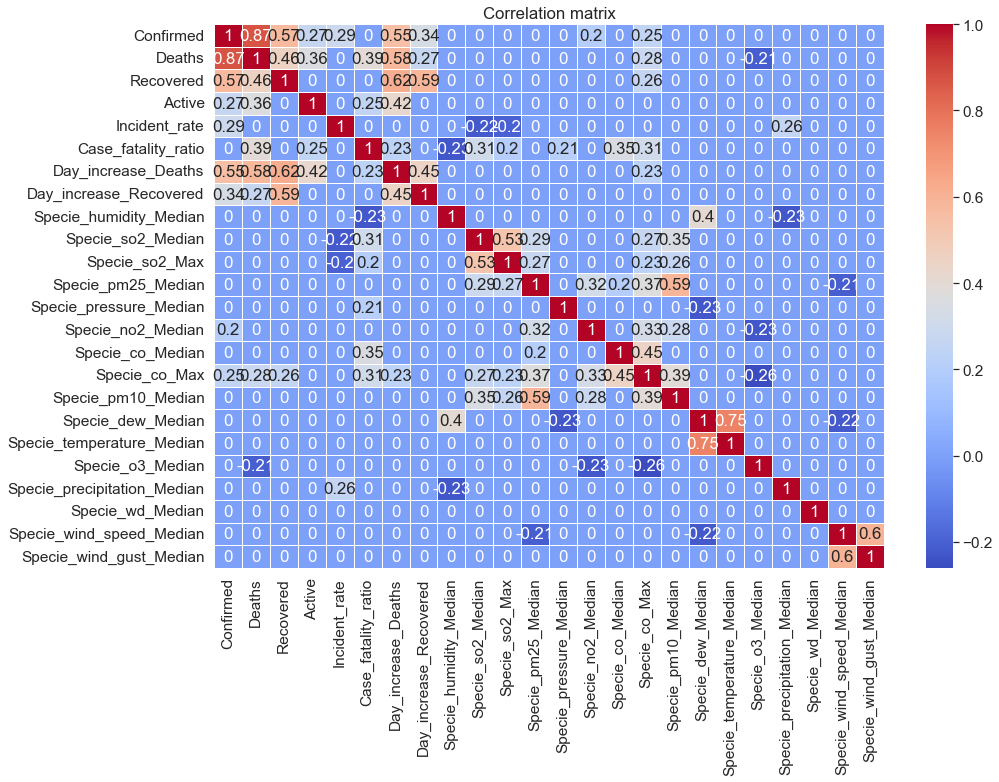

In [79]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_matrix.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# Вывод: между показателем угарного газа (СО) прослеживается корреляция с показателями COVID динамики ('Deaths', 'Recovered',                'Active', ). Возможно - по Оксид азота (NO2) и озона (O3) и уровня осадков (precipitation)